<a href="https://colab.research.google.com/github/Vaelastraszz/KMeans_KNN_coding/blob/master/KMeans_%2B_KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from sklearn import datasets

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

<h2> KMeans </h2>

In [0]:
class KMeans :

    def __init__(self, k = 3, max_iter = 500, tolerance = 0.0001):
        self.k = k
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.centroids = {}
        self.classes = {}


    def euclidean_dist(self, x1, x2):

        distance = 0 

        for i in range(len(x1)) :
            distance += pow(x1[i]-x2[i],2)

        ed = np.sqrt(distance)

        return ed

    def fit(self, X):

        for i in range(self.k):
            self.centroids[i] = X[i]

        for i in range(self.max_iter):

            for j in range(self.k):
                self.classes[j] = []

            for feature in X :
                distance = [self.euclidean_dist(feature, self.centroids[centroid]) for centroid in self.centroids]
                classification = distance.index(min(distance))
                self.classes[classification].append(feature)

            previous = dict(self.centroids)

            for index in self.classes :
                self.centroids[index] = np.average(self.classes[index], axis = 0)

            isOptimal = True

            for centroid in self.centroids :
                
                original = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr-original) / original *100) > self.tolerance :
                    isOptimal = False

            if isOptimal :
                break



In [0]:
knn = KNN()

In [0]:
knn.fit(X)

In [0]:
# Plotting starts here, the colors
colors = 10*["r", "g", "c", "b", "k"]

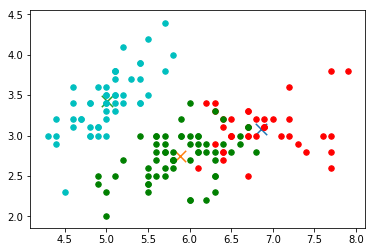

In [0]:
for centroid in knn.centroids:
	plt.scatter(knn.centroids[centroid][0], knn.centroids[centroid][1], s = 130, marker = "x")

for classification in knn.classes:
	color = colors[classification]
	for features in knn.classes[classification]:
		plt.scatter(features[0], features[1], color = color,s = 30)

<h2> KNN </h2>

In [0]:
class KNN :

    def __init__(self, k=3):
        self.k = k
        self.neighbors = {}
    
    def euclidean_dist(self, x1, x2):

        distance = 0 

        for i in range(len(x1)) :
            distance += pow(x1[i]-x2[i],2)

        ed = np.sqrt(distance)

        return ed
    
    def get_k_lowest(self, arr):  
        return np.argpartition(arr,self.k)
    
    def fit(self, X) :
        for i in range(X.shape[0]):
            distance = [self.euclidean_dist(X[i], y) for y in X]
            self.neighbors[i] = np.argpartition(distance,self.k)[:self.k]



    

In [0]:
knn = KNN(k=4)

In [0]:
knn.fit(X)

In [0]:
knn.neighbors

{0: array([ 0, 17,  4, 39]),
 1: array([34, 45,  1, 12]),
 2: array([ 2, 47,  3, 45]),
 3: array([ 3, 29, 47, 30]),
 4: array([ 4, 37,  0, 17]),
 5: array([ 5, 18, 10, 48]),
 6: array([47, 11,  2,  6]),
 7: array([ 7, 39, 49,  0]),
 8: array([ 8, 38, 42,  3]),
 9: array([ 9, 34,  1, 30]),
 10: array([48, 27, 10, 36]),
 11: array([ 7, 29, 11, 26]),
 12: array([ 1, 12,  9, 45]),
 13: array([38, 13, 42,  8]),
 14: array([33, 14, 16, 15]),
 15: array([15, 33, 14,  5]),
 16: array([10, 16, 48, 33]),
 17: array([ 4, 40, 17,  0]),
 18: array([18,  5, 10, 48]),
 19: array([19, 46, 48, 21]),
 20: array([31, 27, 28, 20]),
 21: array([19, 21, 46, 17]),
 22: array([22,  6,  2, 37]),
 23: array([23, 26, 43, 39]),
 24: array([24, 11, 29, 26]),
 25: array([ 9, 25, 34,  1]),
 26: array([26, 23, 43,  7]),
 27: array([27, 28,  0, 39]),
 28: array([27, 28, 39,  0]),
 29: array([11, 30, 29,  3]),
 30: array([29, 30, 34,  9]),
 31: array([31, 20, 28, 27]),
 32: array([33, 32, 46, 19]),
 33: array([33, 15, 